In [1]:
import sys, os
from pathlib import Path
sys.path.append(Path(os.environ['DEV'], 'sunflower').as_posix())
sys.path.append(Path(os.environ['DEV'], 'sunflower/balltracking').as_posix())
sys.path.append(Path(os.environ['DEV'], 'sunflower/balltracking/cython_modules').as_posix())
import fitstools
import glob
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors
from astropy.io.fits import getheader, getdata
from balltracking import mballtrack as mblt
# from cython_modules import interp

plt.rcParams.update({'font.size': 12})
dpi = 168

DSUN_OBS= 1.433675e6 # km
DT = 5*60 # 5 minutes time interval between each frame
CDELT2  = 0.0141875720451562 # solar radius / px
VUNIT = CDELT2 * (DSUN_OBS/2)/DT 

In [2]:
# Data prepped by COR2_tracking_prep.ipynb
datadir = Path(os.environ['DATA'], 'STEREO', 'L7tum', 'prep_fits')
outputdir = Path(os.environ['DATA'], 'STEREO', 'L7tum', 'figures')
datafiles = sorted(glob.glob(Path(datadir, '*.fits').as_posix()))
datafiles0 = sorted(glob.glob(str(Path(os.environ['DATA'], 'STEREO', 'L7tum','*.fts.gz'))))
nfiles = len(datafiles)
sample = fitstools.fitsread(datafiles[0], cube=False)
print(nfiles, datafiles[0])

200 /mnt/c/Data/STEREO/L7tum/prep_fits/prep_0000.fits


In [3]:
DTYPE = np.float32
def prep_data(image):
    image2 =np.sqrt(abs(image))
    image3 = image2.max() - image2
    surface = (image3 - image3.mean())/image3.std()
    return surface.copy(order='C').astype(DTYPE)

Show a sample image

0.0 20.84569134634995 (659, 3600)


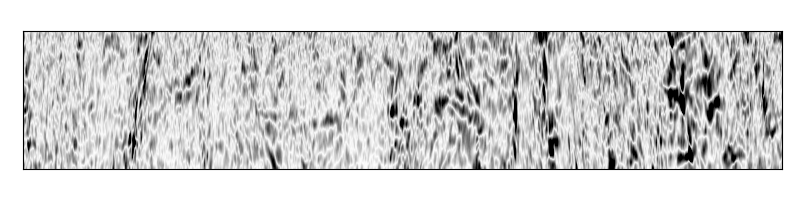

In [14]:
%matplotlib widget
print(sample.min(), sample.max(), sample.shape)
surface = prep_data(sample)

vmin = 0
vmax = 4

smin = -5
smax = 1

fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(8,2))
im = axs.imshow(sample, vmin=vmin, vmax=vmax, origin='lower', cmap='gray_r')
# position for the colorbar
# divider = make_axes_locatable(axs)
# cax = divider.append_axes('right', size='1%', pad=0.3)
# Adding the colorbar
# cbar = plt.colorbar(im, cax = cax)
# axs.set_xlim([0, 600])
# axs.set_ylim([0, 250])

# disabling xticks by Setting xticks to an empty list
plt.xticks([]) 
 
# disabling yticks by setting yticks to an empty list
plt.yticks([]) 
plt.tight_layout()
plt.savefig('images/prepped_unwrapped.png')

In [5]:
mbt_dict = {"nt":80,
            "rs":4,
            "am":1,
            "dp":0.3,
            "tdx":1,
            "tdy":30,
            "zdamping":1,
            "ballspacing":15,
            "intsteps":20,
            "mag_thresh":2,
            "noise_level":1.5,
            "track_emergence":True,
            "prep_function":prep_data,
            "datafiles":datafiles,
            "do_plots":False,
            "astropy":False,
            "verbose":True,
            "fig_dir":Path(datadir, 'figures')}

# mbt_p, mbt_n = mblt.mballtrack_main(**mbt_dict)

mbt = mblt.MBT(polarity=1, **mbt_dict)

nballs_max = 1186200


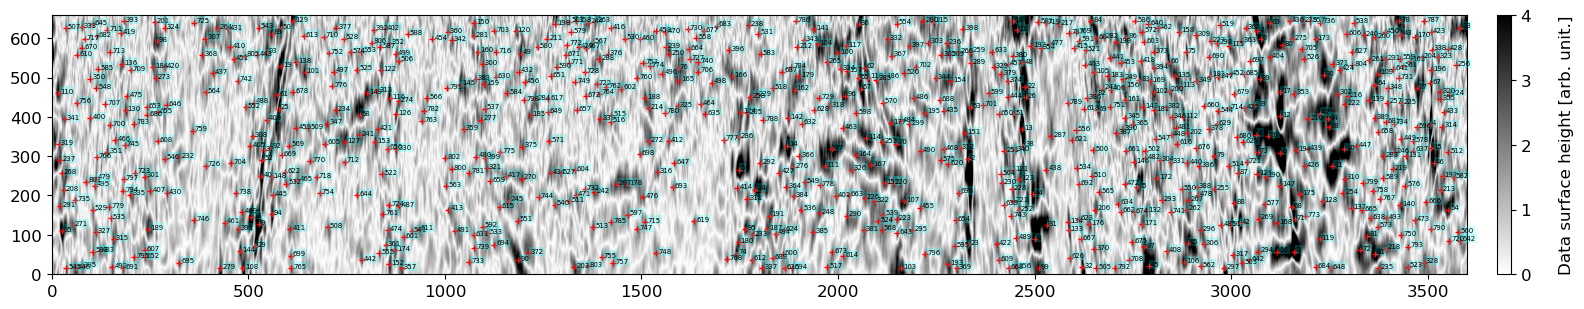

In [6]:
%matplotlib inline
plt.close('all')

fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(16,6))
im = axs.imshow(mbt.image, vmin = 0, vmax=4, origin='lower', cmap='gray_r')
# position for the colorbar
divider = make_axes_locatable(axs)
cax = divider.append_axes('right', size='1%', pad=0.3)
# Adding the colorbar
cbar = plt.colorbar(im, cax = cax)
cax.set_ylabel('Data surface height [arb. unit.]', fontsize=12, labelpad=20)

axs.plot(mbt.xstart, mbt.ystart, 'r+', ms=4, markerfacecolor='none')
labels = np.arange(0, mbt.nballs)
for ball in labels:
    axs.text(mbt.xstart[ball]+5, mbt.ystart[ball], str(ball), color='black', fontsize=5, bbox=dict(facecolor='cyan', alpha=0.2, edgecolor='none', pad=1))

plt.tight_layout()
# bmask = mbt.ystart <= 300
# axs.plot(mbt.xstart[bmask], mbt.ystart[bmask], 'co', ms=10, markerfacecolor='none')

In [7]:
mbt.track_all_frames()

Tracking with 807 initial balls
Frame n=0: /mnt/c/Data/STEREO/L7tum/prep_fits/prep_0000.fits
Frame n=1: /mnt/c/Data/STEREO/L7tum/prep_fits/prep_0001.fits
Frame n=2: /mnt/c/Data/STEREO/L7tum/prep_fits/prep_0002.fits
Frame n=3: /mnt/c/Data/STEREO/L7tum/prep_fits/prep_0003.fits
Frame n=4: /mnt/c/Data/STEREO/L7tum/prep_fits/prep_0004.fits
Frame n=5: /mnt/c/Data/STEREO/L7tum/prep_fits/prep_0005.fits
Frame n=6: /mnt/c/Data/STEREO/L7tum/prep_fits/prep_0006.fits
Frame n=7: /mnt/c/Data/STEREO/L7tum/prep_fits/prep_0007.fits
Frame n=8: /mnt/c/Data/STEREO/L7tum/prep_fits/prep_0008.fits
Frame n=9: /mnt/c/Data/STEREO/L7tum/prep_fits/prep_0009.fits
Frame n=10: /mnt/c/Data/STEREO/L7tum/prep_fits/prep_0010.fits
Frame n=11: /mnt/c/Data/STEREO/L7tum/prep_fits/prep_0011.fits
Frame n=12: /mnt/c/Data/STEREO/L7tum/prep_fits/prep_0012.fits
Frame n=13: /mnt/c/Data/STEREO/L7tum/prep_fits/prep_0013.fits
Frame n=14: /mnt/c/Data/STEREO/L7tum/prep_fits/prep_0014.fits
Frame n=15: /mnt/c/Data/STEREO/L7tum/prep_fits/p

In [13]:
np.savez_compressed(Path('/mnt/c/Data/STEREO/L7tum/prep_fits/balltrack/mblt.npz'), ballpos=mbt.ballpos, balls_age=mbt.balls_age_t)

In [14]:
# filter out negative velocities
ballpos = mbt.ballpos.copy()
ballpos[ballpos == -1] = np.nan
vx = np.abs(ballpos[0, :, 1:] - ballpos[0, :, 0:-1])
bad_vel = np.nansum(vx > 2, axis=1)
reject_balls = np.where(bad_vel > 2)[0]
reject_balls

array([   6,   20,   31,   47,   72,   90,  197,  202,  237,  391,  570,
        577,  896, 1023, 1485, 1529, 1997, 2041, 2078, 2125, 2161, 2323,
       2509, 2595, 3153, 3223, 3234, 3342, 3350, 3483, 3514, 3860, 4015,
       4280, 4346, 4588, 4771, 5557, 5619, 5672, 6551, 6722, 6902])

In [11]:
plt.close('all')
vmin = 0
vmax = 4
datafiles0 = sorted(glob.glob(str(Path(os.environ['DATA'], 'STEREO', 'L7tum','*.fts.gz'))))

# Remove the balls that are only here for their 1st frame - use ballage!

balls = np.where(mbt.balls_age_t[..., -1]>20)[0]
labels = balls[::4]

for i in range(0, mbt.nt):
# for i in range(0, 1):

    sample = np.abs(fitstools.fitsread(datafiles[i], cube=False))
    hdr = getheader(datafiles0[i])
    surface = prep_data(sample)

    fig, axs= plt.subplots(nrows=1, ncols=1, figsize=(1920/dpi, 500/dpi), dpi=dpi)
    im = axs.imshow(sample, vmin=vmin, vmax=vmax, origin='lower', cmap='Greys')
    # position for the colorbar
    divider = make_axes_locatable(axs)
    cax = divider.append_axes('right', size='1%', pad=0.3)
    # Adding the colorbar
    cbar = plt.colorbar(im, cax = cax)
    cax.set_ylabel('norm. rad. [units of std.]', fontsize=12, labelpad=20)
    # axs.plot(mbt.ballpos[0,b,i], mbt.ballpos[1,b,i], 'r+')
    axs.plot(ballpos[0, balls, i], ballpos[1, balls, i], 'r+', ms=4, markerfacecolor='none')
    for ball in labels:
        if np.isfinite(ballpos[0, ball, i]):
            axs.text(ballpos[0, ball, i]+20, ballpos[1, ball, i], str(ball), color='black', fontsize=5, bbox=dict(facecolor='cyan', alpha=0.2, edgecolor='none', pad=1))

    axs.set_xlim([0, 3600])
    axs.set_ylim([0, 659])
    date_obs = hdr['DATE-OBS'][:-4]
    axs.set_title(f'Tracking of PDS subset on L7 TUM - {date_obs} - Frame #{i}', fontsize=12)
    axs.set_xlabel('Azimuth [px]')
    axs.set_ylabel('Radius [px]')
    
    plt.tight_layout()

    fig.savefig(Path(outputdir, f'Balltrack_V4_thresh_2_L7tum_{i:04d}.jpg'), dpi=dpi) #
    plt.close()

Calculate velocity profiles

In [51]:
# Remove the balls that are only here for their 1st frame - use ballage!
ballpos = mbt.ballpos.copy()
ballpos[ballpos == -1] = np.nan
keep_tracks_mask = mbt.balls_age_t[:, -1] >= 5
ballpos = ballpos[:, keep_tracks_mask, :]
balls_age = mbt.balls_age_t[keep_tracks_mask, :]
valid_balls = mbt.valid_balls_mask_t[keep_tracks_mask, :]

In [52]:
balls_age.shape, balls_age, valid_balls

((5582, 80),
 array([[ 2,  3,  4, ..., 40, 40, 40],
        [ 2,  3,  4, ..., 63, 63, 63],
        [ 2,  3,  4, ..., 36, 36, 36],
        ...,
        [ 1,  1,  1, ...,  3,  4,  5],
        [ 1,  1,  1, ...,  3,  4,  5],
        [ 1,  1,  1, ...,  3,  4,  5]], dtype=uint32),
 array([[ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        ...,
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True]]))

In [53]:
ballpos[0, :, 0:3]

array([[3124.2278, 3124.203 , 3124.1562],
       [3161.172 , 3161.1348, 3161.7673],
       [2331.346 , 2331.3801, 2331.3044],
       ...,
       [      nan,       nan,       nan],
       [      nan,       nan,       nan],
       [      nan,       nan,       nan]], dtype=float32)

In [54]:
# TODO: Instead of doing what I did below, should take 1st and final position of each given ball, 
# and differentiate that. The ball age should be used, the tracks doesn't start at time index = 0 either
# and do not end at time index = -1, right? 
px = 0.5*(ballpos[0,:,0:-1] + ballpos[0,:,1:])
py = 0.5*(ballpos[1,:,0:-1] + ballpos[1,:,1:])
vx = (ballpos[0,:,1:] - ballpos[0,:,0:-1])*VUNIT
vy = (ballpos[1,:,1:] - ballpos[1,:,0:-1])*VUNIT  
# # Eliminate backtracks
vy[vy<0] = np.nan
nan_balls_mask = np.all(np.isnan(vy), axis=1)
keep_balls_mask = np.logical_not(nan_balls_mask)
px = px[keep_balls_mask, :]
py = py[keep_balls_mask, :]
vx = vx[keep_balls_mask, :]
vy = vy[keep_balls_mask, :]

Average each ball velocity over time

In [55]:
vy_tavg = np.nanmean(vy, axis=1)
vy_tstd = np.nanstd(vy, axis=1)
px_tavg = np.nanmean(px, axis=1)
px_tavg.shape, vy_tavg.shape

((5543,), (5543,))

In [56]:
from scipy.stats import binned_statistic
bin_means, bin_edges, binnumber = binned_statistic(px_tavg, vy_tavg, statistic='mean', bins=np.arange(0,3601,100))

bin_std, _, _ = binned_statistic(px_tavg, vy_tavg, statistic='std', bins=np.arange(0,3601,100))
bin_count, _, _ = binned_statistic(px_tavg, vy_tavg, statistic='count', bins=np.arange(0,3601,100))
vmean_err = bin_std/np.sqrt(bin_count)
vmean = bin_means.mean()
deg_bins = (bin_edges[:-1]+bin_edges[1:])/2/10
bin_edges.shape, bin_means.shape, deg_bins

((37,),
 (36,),
 array([  5.,  15.,  25.,  35.,  45.,  55.,  65.,  75.,  85.,  95., 105.,
        115., 125., 135., 145., 155., 165., 175., 185., 195., 205., 215.,
        225., 235., 245., 255., 265., 275., 285., 295., 305., 315., 325.,
        335., 345., 355.], dtype=float32))

In [19]:
# Save the data
np.savez('vizzu_velocity_data', px_tavg=px_tavg, vy_tavg=vy_tavg)

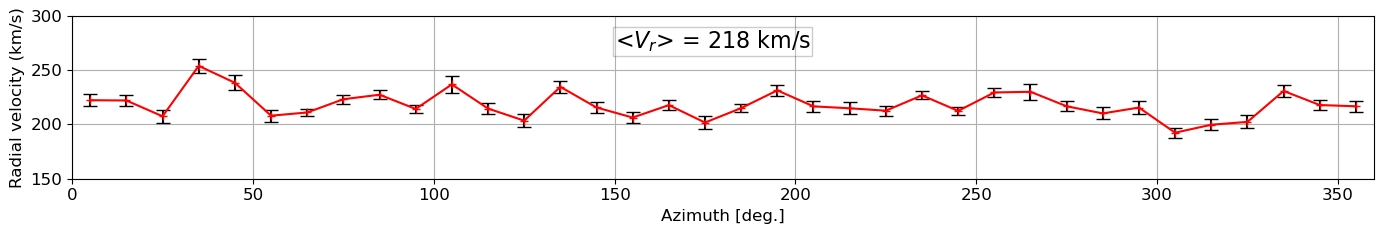

In [61]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(14,7))
axs.errorbar((360 - deg_bins), bin_means, yerr=vmean_err, fmt='r+-', capsize=5, ecolor='black', label='radial velocity [km/s]')
# axs.set_ylim([0, 350])
axs.set_xlabel('Azimuth [deg.]')
axs.set_ylabel('Radial velocity (km/s)')
axs.set_xlim([0, 360])
axs.set_ylim([150, 300])
# axs2 = axs.twinx()
# axs2.bar(deg_bins, bin_count, width=5, label='Ball count')
# axs2.set_ylabel('Ball count per bin')
# axs2.legend(loc='lower right')
axs.grid()
axs.set_aspect(0.3)
plt.tight_layout()
axs.text(150, 270, fr'<$V_r$> = {int(vmean)} km/s', fontsize=16, bbox=dict(facecolor='white', alpha=0.2, edgecolor='black', pad=1))
fig.savefig(Path(outputdir, f'Radial_velocity_unwrapped.png'), dpi=dpi)

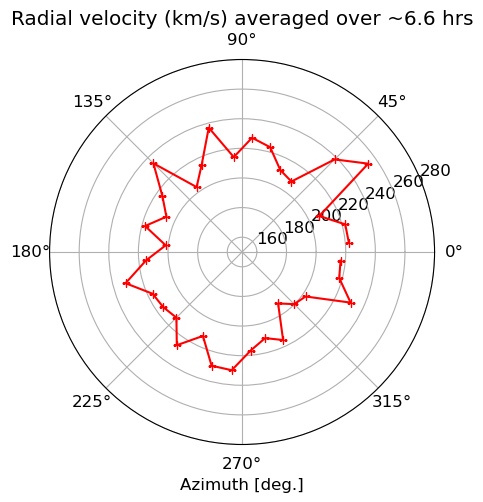

In [59]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(7,5), subplot_kw={'projection': 'polar'})
axs.plot((360 - deg_bins)*np.pi/180, bin_means, 'r+-', label='radial velocity [km/s]')
# axs.set_ylim([0, 350])
axs.set_xlabel('Azimuth [deg.]')
axs.set_title('Radial velocity (km/s) averaged over ~6.6 hrs')
axs.set_ylim([150, 280])

# axs.grid()
# plt.tight_layout()
# axs.legend()
# axs.text(0, 160, fr'<$V_r$> = {int(vmean)} km/s', fontsize=16, bbox=dict(facecolor='white', alpha=0.2, edgecolor='black', pad=1))
fig.savefig(Path(outputdir, f'Radial_velocity_polar.png'), dpi=dpi)

In [ ]:
l7tumfiles = sorted(glob.glob(str(PurePath('C:\Data\STEREO\L7tum\*.fts.gz'))))
_, hdr = fitstools.fitsread(l7tumfiles[0], cube=False, astropy=True, header=True)

In [ ]:
plt.close('all')

duration = round(mbt_dict['nt']*5)/60
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(7,5))
axs.hist(vy.ravel(), bins=50);
axs.set_xlabel('Vy [km/s]')
axs.set_ylabel('Nb of tracking balls')
plt.grid(color='white', lw = 0.5, axis='x')
xticks = np.arange(0,1001, 100)
plt.xticks(xticks);
axs.set_xlim([0, 1000])
axs.set_title(f'Vy distribution integrated over {duration:0.1f} hrs')
plt.tight_layout()
axs.text(0.7, 0.5, f'<Vy> = {np.nanmean(vy):0.0f} km/s', transform=fig.transFigure)

In [ ]:
mask_R1 = py < 659/2
mask_R2 = py >= 659/2
mask_X1 = px < 3600/2
mask_X2 = px >= 3600/2

In [ ]:
vy_R1 = vy[mask_R1].ravel()
vy_R2 = vy[mask_R2].ravel()
vy_X1 = vy[mask_X1].ravel()
vy_X2 = vy[mask_X2].ravel()

In [ ]:
plt.close('all')

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(7,5))
axs.hist(vy_R2, bins=50, label=f'R > 8 Rs: <Vy> = {np.nanmean(vy_R2):0.0f} km/s');
axs.hist(vy_R1, bins=50, label=f'4 Rs < R < 8 Rs: <Vy> =  {np.nanmean(vy_R1):0.0f} km/s', alpha=0.7);
axs.set_xlabel('Vy [km/s]')
axs.set_ylabel('Nb of tracking balls')
plt.grid(color='white', lw = 0.5, axis='x')
xticks = np.arange(0,1001, 100)
plt.xticks(xticks);
axs.set_xlim([0, 1000])
axs.set_title(f'Vy distribution integrated over {duration:0.1f} hrs')
plt.legend()

In [ ]:
plt.close('all')

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(7,5))
axs.hist(vy_X2, bins=50, label=f'Relative azimuth > 180 deg: <Vy> = {np.nanmean(vy_X2):0.0f} km/s');
axs.hist(vy_X1, bins=50, label=f'Relative azimuth < 180 deg: <Vy> =  {np.nanmean(vy_X1):0.0f} km/s', alpha=0.7);
axs.set_xlabel('Vy [km/s]')
axs.set_ylabel('Nb of tracking balls')
plt.grid(color='white', lw = 0.5, axis='x')
xticks = np.arange(0,1001, 100)
plt.xticks(xticks);
axs.set_xlim([0, 1000])
axs.set_title(f'Vy distribution integrated over {duration:0.1f} hrs')
plt.legend()